In [1]:
!pip install psycopg2

In [4]:
import sys
sys.path.append('..\\sif_research\\data_utils')

import sif_utils as su
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import importlib
import seaborn # optional
seaborn.set() # optional
plt.rcParams['figure.figsize'] = [10, 6] # increase figure size


# Adds the research_framework folder to system path so python knows to look their for imports
sys.path.append('..\\sif_research\\research_framework') # CHANGE FOR MAC OS

import metrics

## Use code from backtest example to load data ##

In [9]:
# Global Variables / Research Environment Settings
start_date = datetime.datetime(day=3, month=1, year=2012)
end_date = datetime.datetime(day=1, month=1, year=2017)
days = (end_date - start_date).days

# Number of stocks to have in the universe
top_N = 100

In [10]:
# Grab all tickers in the universe
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))

In [11]:
# Pull data needed for research and store into variables, or however
# you want to handle your data.

# This is the order of the parameters, once you are comfortable feel free
# to not use paramater=foo and just do foo, bar, ...

price_attrs = ['open', 'close', 'low', 'high']
data = su.get_equity_data(tickers=tickers, start_date=start_date, end_date=end_date,
                          attributes=price_attrs)

In [12]:
# Convert from dictionary of dataframes to numpy arrays

OPEN = data['open'].astype(float).values
CLOSE = data['close'].astype(float).values
LOW = data['low'].astype(float).values
HIGH = data['high'].astype(float).values

In [13]:
universe_filter = su.create_universe_filter(top_N, start_date, end_date, tickers, data['close'].index.values)

In [14]:
# Fills all the tickers not in the universe at that point with 0
FILLED_CLOSE = metrics.fill_nonuniverse(universe_filter.values, CLOSE, fill_val=0)

## My strategy going here ##

In [15]:
def strategy(day):
    """
    Attempting to implement basic mean reversion strategy
    :return: numpy array of shape: 1 x len(Universe) with equity holdings
    """
   

In [16]:
# compute holdings
universe_size = len(tickers)
holdings = metrics.backtest(strategy, CLOSE.shape[0], universe_size, lookback)
print(f'Holdings Shape: {holdings.shape}')

NameError: name 'lookback' is not defined

## Starting again with stuff from Hao's notebook ##

In [4]:
import sys
import pandas as pd
import numpy as np
import datetime
sys.path.append('..\\sif_research\\research_framework')
import metrics
import os
from operators import rank, ts_rank, group_rank, weight


sys.path.append('..\\sif_research\\data_utils')

import sif_utils as su

In [5]:
# Global Variables / Research Environment Settings
start_date = datetime.datetime(day=1, month=1, year=2012)
end_date = datetime.datetime(day=1, month=1, year=2017)
days = (end_date - start_date).days
lookback = 20
delay = 1
top_N = 200
initial_investment = 1000
save_backtest_result = True
backtest_result_folder = './backtest_result'
# Get all tickers
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))

In [16]:
# Grab all tickers in the universe and sort them
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))
universe_size = len(tickers)

price_attrs = ['open', 'close', 'low', 'high', 'volume']
data = su.get_equity_data(tickers=tickers, start_date=start_date,
                          end_date=end_date, attributes=price_attrs)


In [17]:
OPEN = data['open'].astype(float).values
CLOSE = data['close'].astype(float).values
LOW = data['low'].astype(float).values
HIGH = data['high'].astype(float).values
VOLUME = data['volume'].astype(float).values

# Create universe filter table
all_dates = data['close'].index.values
universe_filter = su.create_universe_filter(top_N, start_date, end_date, tickers, all_dates)

# Grab all tickers in the universe and sort them
tickers = sorted(su.get_universe_tickers(top_N, start_date, end_date))
universe_size = len(tickers)
universe_filter_arr = universe_filter.values

In [19]:
data.keys()

dict_keys(['open', 'close', 'low', 'high', 'volume'])

In [8]:
# Hao's example alpha
def alpha(day):
    # raw factor computed for all tickers (not necesarily the valid universe)
    factor = -rank(CLOSE[day - delay] - CLOSE[day - delay - 4])
    return weight(factor, universe_filter_arr[day])

In [14]:
# See Zura et al. 151 Trading Strategies Section 3.1
def momentum_alpha(day):
    momentum = rank((CLOSE[day - delay] / CLOSE[day - delay - 30]))
    return weight(momentum, universe_filter_arr[day])

In [ ]:
# Can do something with close to open overnight
def overnight(day):
    

### Some notes from meeting 2/24/2020 to possibly make alphas ### 

# Momentum again from video from 2/24/2020
# Look at convexity and concavity
# y = Gain * t + Acc * x^2
# Accelerated vs decelerated gain
# Whether coefficients are positive or negative
# Approximating curves with polynomials

# Skewness and momentum
# Skewness as a signal for stocks that are overbrought
# Proxy for skew, max daily return from past 20 days/ past month (positive skew)
    #Could also do negative skew with minimum
# Assume return over trailing year as momentum
# More strongly positive skew and positive momentum represents weakened momentum
# Positive momentum and less skew is enhanced momentum
# Negativee momentum and positive skew is enhanced momentum
# Negative momenutum and less skew is weakened momentum

Ideas for fundamanetal frm Hao
    Rank ( equity/ assets) <-- cross sectional
    ts_rank(-debt/equity, 252 <-- or whatever lookback) <-- ts_info
    abs(eps[day - 1] - eps[day - 2]) > 0 <-- check to see if comany updated financial statements
        Include mean reversion/momentum factor and combine with this to build an alpha

In [48]:
CLOSE[0]

array([ 58.747,  19.82 ,     nan,   5.8  ,  56.72 ,  52.95 ,  28.57 ,
        28.89 ,  54.46 ,  40.77 ,  42.4  ,  22.44 ,  60.63 ,  88.42 ,
        24.07 ,  70.57 ,  10.7  ,  64.11 ,  23.088,  58.81 , 179.03 ,
        67.61 ,  95.93 ,  78.65 ,  86.35 ,  42.22 ,  28.945,  48.39 ,
        23.86 ,  74.22 ,     nan,   5.8  ,  50.54 ,  10.656,  25.86 ,
        41.75 ,  11.58 ,  74.45 ,  33.007,  47.97 ,  51.02 ,  74.76 ,
       124.29 , 113.5  ,  20.51 , 485.15 , 181.27 ,  56.27 ,  35.01 ,
        51.06 ,  44.14 ,  29.455,  77.68 ,  15.595,  51.895,  28.33 ,
        45.08 ,  93.98 ,  70.33 ,  70.13 ,  27.27 ,  32.96 ,  34.33 ,
       184.63 ,  58.53 ,  23.6  ,  49.1  ,  57.19 ,  21.54 ,  43.23 ,
        45.54 ,  34.93 ,  74.12 ,  12.248,  49.126,  91.05 ,  39.465,
        39.39 ,  43.75 ,  74.17 ,  84.6  ,  45.76 ,  25.3  ,  24.57 ,
        18.63 ,  22.04 ,  37.33 ,  32.86 ,  34.45 ,  41.52 , 110.37 ,
         4.978,  52.5  ,   8.04 ,  39.83 ,  18.63 ,  89.37 ,  46.51 ,
        79.31 ,  88.

        return    sharpe   sortino  drawdown  turnover  long count  \
year                                                                 
2012  0.018793  0.398234  0.550382 -0.044841  0.222771  100.713043   
2013  0.025247  0.805387  1.144731 -0.015775  0.224419  100.126984   
2014  0.028491  0.672619  0.941209 -0.027340  0.226788   99.861111   
2015 -0.042102 -0.979877 -1.274938 -0.066684  0.233241  100.432540   
2016 -0.047300 -0.856347 -1.171753 -0.101999  0.234090   97.494024   

      short count  
year               
2012    99.095652  
2013   100.873016  
2014   101.138889  
2015    97.904762  
2016    98.537849  


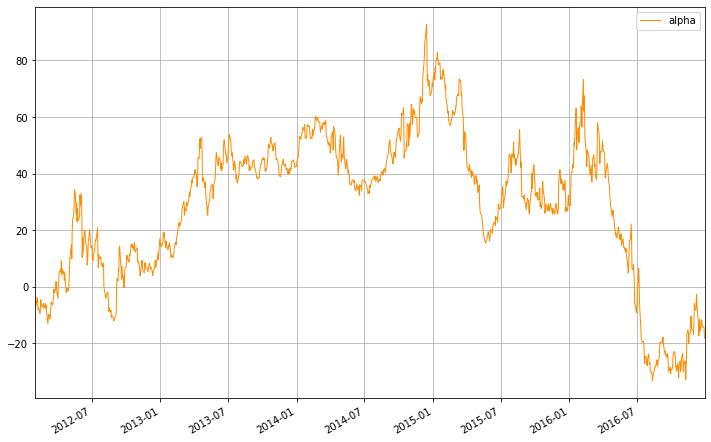

In [15]:
# run backtest, print the performance table and draw the chart
holdings = metrics.backtest(momentum_alpha, CLOSE.shape[0], universe_size, lookback)
daily_returns = metrics.daily_return(holdings[:-1], OPEN[lookback:] )
performance = metrics.generate_performance_table(daily_returns, holdings,
                                                 dates=all_dates[lookback:-1],
                                                tickers=tickers)
print(performance)
pnl_df = pd.DataFrame(daily_returns.cumsum() * initial_investment,index = data['close'].iloc[lookback:-1].index, columns = ['alpha'])
chart = pnl_df.plot(grid=True,figsize=[12,8],linewidth=1,color='darkorange')


In [ ]:
# save backtest result
if save_backtest_result == True:
    if not os.path.exists(backtest_result_folder):
        os.makedirs(backtest_result_folder)
    pnl_df.to_csv(backtest_result_folder+'/'+'pnl.csv')
    pd.DataFrame(holdings[:-1],index = data['close'].iloc[lookback:-1].index, columns = tickers).to_csv(backtest_result_folder+'/'+'holdings.csv')
    chart.get_figure().savefig(backtest_result_folder+'/'+'performance.png')
        